<a href="https://colab.research.google.com/github/arwahh/Data_projects/blob/main/EDA_prediction_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving titanic.zip to titanic.zip


In [ ]:
import pandas as pd
import zipfile

# Unzip the file
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Now read the csv file
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


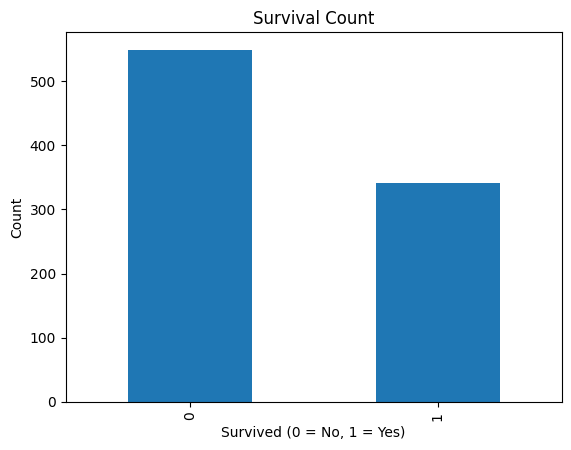

In [ ]:
import matplotlib.pyplot as plt
df['Survived'].value_counts().plot(kind='bar')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

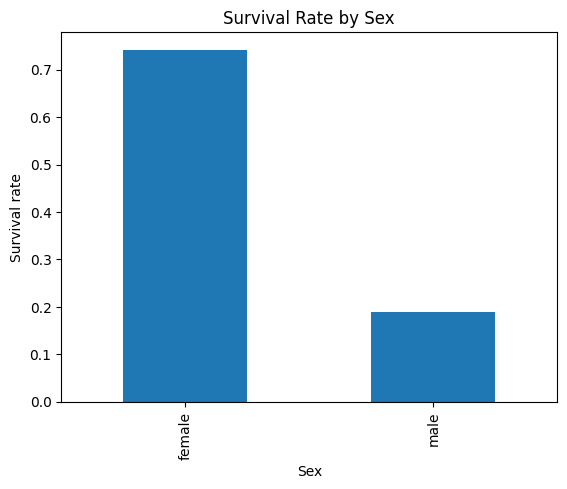

In [ ]:
survived_by_sex = df.groupby('Sex')['Survived'].mean()

survived_by_sex.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.title('Survival Rate by Sex')
plt.show()

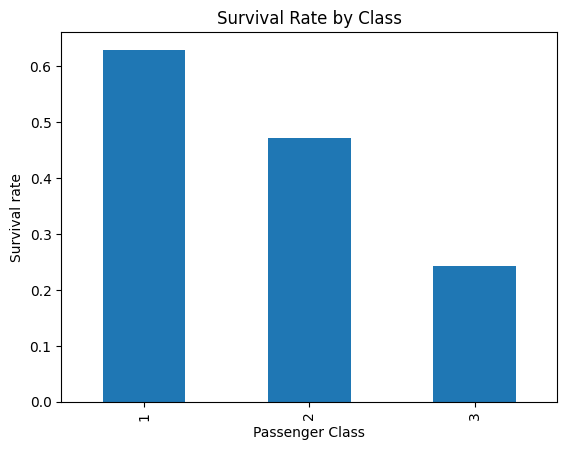

In [ ]:
survived_by_pclass = df.groupby('Pclass')['Survived'].mean()

survived_by_pclass.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rate')
plt.title('Survival Rate by Class')
plt.show()

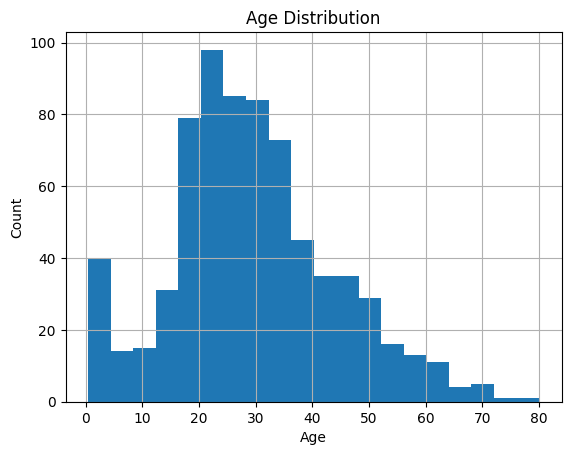

In [ ]:
df['Age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [ ]:

df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])

In [ ]:

df['Sex_num'] = df['Sex'].map({'female': 1, 'male': 0})

embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked_num'] = df['Embarked'].map(embarked_mapping)

In [ ]:

df_shuffled = df.sample(frac=1, random_state=42)

train_size = int(0.8 * len(df_shuffled))

train_data = df_shuffled[:train_size]
test_data  = df_shuffled[train_size:]

train_data.head(), test_data.head()

(     PassengerId  Survived  Pclass  \
 709          710         1       3   
 439          440         0       2   
 840          841         0       3   
 720          721         1       2   
 39            40         1       3   
 
                                                   Name     Sex   Age  SibSp  \
 709  Moubarek, Master. Halim Gonios ("William George")    male  28.0      1   
 439             Kvillner, Mr. Johan Henrik Johannesson    male  31.0      0   
 840                        Alhomaki, Mr. Ilmari Rudolf    male  20.0      0   
 720                  Harper, Miss. Annie Jessie "Nina"  female   6.0      0   
 39                         Nicola-Yarred, Miss. Jamila  female  14.0      1   
 
      Parch            Ticket     Fare Embarked  Sex_num  Embarked_num  
 709      1              2661  15.2458        C        0             0  
 439      0        C.A. 18723  10.5000        S        0             2  
 840      0  SOTON/O2 3101287   7.9250        S        0       

In [ ]:
print("accuracy of simple rule-based model:", round(accuracy * 100, 2), "%")

accuracy of simple rule-based model: 81.01 %
